In [1]:
import pandas as pd

PATH_DRIFT = '../data/NOAA/trajectories/traj_106556.csv'
#PATH_DRIFT = '../data/NOAA/trajectories/traj_101859.csv'

drift_tab = pd.read_csv(PATH_DRIFT)
drift_tab.head()

,Unnamed: 0,latitude,longitude,time,ids
0,3353876,3.31430,-23.01045,101709.0,106556
1,3353877,3.30621,-23.01861,101710.0,106556
2,3353878,3.29728,-23.02732,101711.0,106556
3,3353879,3.28803,-23.03532,101712.0,106556
4,3353880,3.27921,-23.04325,101713.0,106556


In [4]:
from utils.read_data import convert_date_back

date = convert_date_back(drift_tab['time'].iloc[-1])
date

datetime.datetime(2011, 9, 15, 4, 0)

In [3]:
def get_true_drift_positions_NOAA(path_drift):
    drift_tab = pd.read_csv(path_drift)#.head(73) #keep only 72h trajectories

    lat = drift_tab['latitude'].tolist()
    lon = drift_tab['longitude'].tolist()
    time = drift_tab['time'].tolist()

    return lon, lat, time

In [8]:
from datetime import datetime, timedelta
import math
import time


# creating variable for latitude and longitude to list
lon,lat,time_drift = get_true_drift_positions_NOAA(PATH_DRIFT)

# get frame
lat_max = math.ceil(max(lat)+1)
lat_min = math.floor(min(lat)-1)
lon_max = math.ceil(max(lon)+1)
lon_min = math.floor(min(lon)-1)

# get time
#time_drift = drift_tab['time'].tolist()
min_time = min(time_drift) - 1
max_time = max(time_drift) + 1
# Convert time from hours back to date+time
min_date = convert_date_back(min_time)
max_date = convert_date_back(max_time) + timedelta(days=1)
date_str_min = str(min_date.year)+'-'+str(min_date.month)+'-'+str(min_date.day)
date_str_max = str(max_date.year)+'-'+str(max_date.month)+'-'+str(max_date.day)

In [9]:
print('coord', lat_min, lat_max, lon_min,lon_max)
print('dates:', date_str_min,' to ', date_str_max)

coord 1 5 -25 -22
dates: 2011-8-8  to  2011-8-12


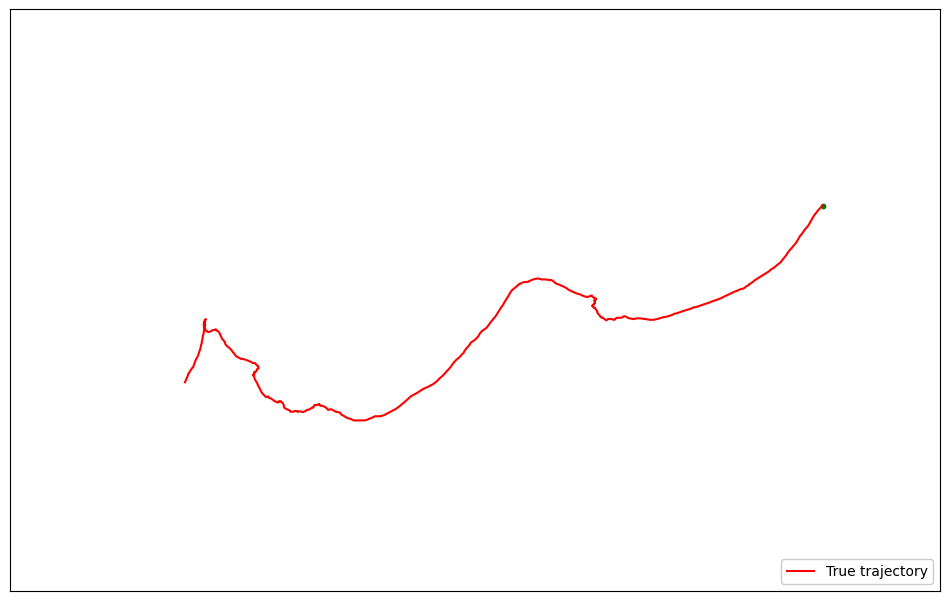

In [8]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

true_lon, true_lat, true_time = get_true_drift_positions_NOAA(PATH_DRIFT)

# setting the size of the map
fig = plt.figure(figsize=(12,9))

# creating the map - setting latitude and longitude
m = Basemap(projection = 'mill', llcrnrlat = lat_min, urcrnrlat = lat_max, llcrnrlon = lon_min, urcrnrlon = lon_max, resolution = 'i') 

# drawing the coastline
m.drawcoastlines()
m.drawcountries(color='gray')
m.drawstates(color='gray')
m.drawcoastlines()
m.fillcontinents()


# plotting the map
#m.scatter(lon, lat, latlon = True, s = 10, c = 'red', marker = '.', alpha = 1)
m.plot(true_lon,true_lat,latlon=True,linewidth=1.5,color='r', label='True trajectory')
m.scatter(true_lon[0],true_lat[0], latlon=True,s=10,color='g',marker ='o',alpha=1)
#m.plot(longitudes,latitudes,latlon=True,linewidth=1.5,color='b', label='Physical model')
#m.plot(longitudes_dd,latitudes_dd,latlon=True,linewidth=1.5,color='g', label='Hybrid model')
#plot grid ocean
#m.scatter(test_mesh_lon,test_meah_lat,latlon=True,s=10,color='k',marker ='+',alpha=0.5, label='Grid for wind data')

plt.legend(loc = 'lower right',framealpha=1)
plt.show()


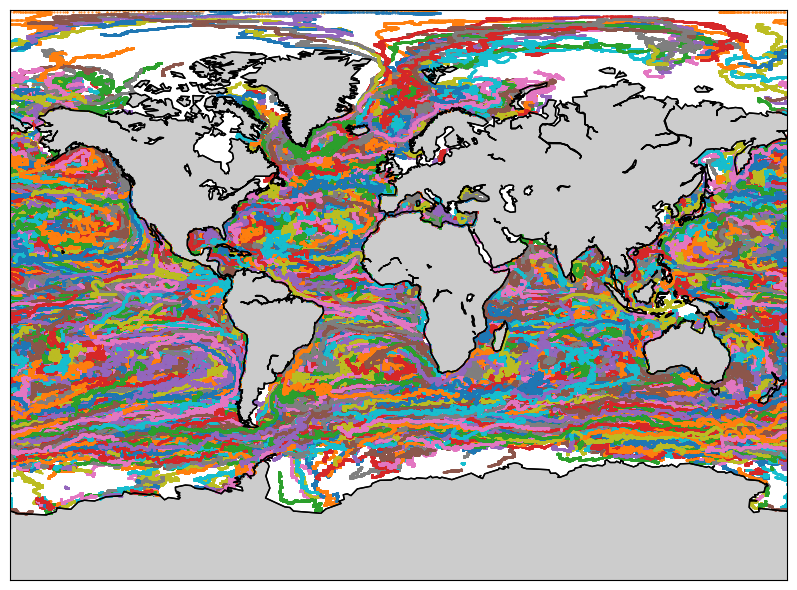

In [4]:
import os
import pandas as pd
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# This is the path where all the files are stored.
FOLDER_PATH = '../data/NOAA/trajectories'

# setting the size of the map
fig = plt.figure(figsize=(12,6))

# creating the map - setting latitude and longitude
m = Basemap(projection = 'mill', llcrnrlat = -90, urcrnrlat = 90, llcrnrlon = -180, urcrnrlon = 180, resolution = 'c') 

# drawing the coastline
m.drawcoastlines()
#m.drawcountries(color='gray')
# m.drawstates(color='gray')
m.drawcoastlines()
m.fillcontinents()
n=0
# Open one of the files,
for data_file in os.listdir(FOLDER_PATH):
    data_file = os.path.join(FOLDER_PATH, data_file)
    #drift_tab = pd.read_csv(data_file)

    lon, lat, _ = get_true_drift_positions_NOAA(data_file)
    n = n + len(lon)
    # plotting the map
    
    try:
        #m.plot(lon,lat,latlon=True,linewidth=1.5)
        m.scatter(lon, lat, latlon = True, s = 1, marker = '.', alpha = 1)
    except:
        pass
plt.tight_layout()
plt.savefig('figures/dataset_NOAA.png')


In [5]:
n

165754333

Stats